Machine Learning: Performing Principal Component Analysis (PCA)
Chanin Nantasenamat


In this Jupyter notebook, we will be performing Principal Component Analysis (PCA) using the Automobile dataset as an example.

**Load library**

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

**Load dataset from Google Drive**

In [123]:
path="/content/drive/MyDrive/Data Visualization Week 4/Automobile_data.csv"
df=pd.read_csv(path)
df.head(5)

,make,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


**Perform data cleaning by replacing all NaN in dataset with the average values of the columns**

In [139]:
# prompt: replace all NaN in dataset with the average values of the columns

df = df.fillna(df.mean())
df.head(5)


<ipython-input-139-72acd90128da>:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



,make,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [140]:
print(df.columns)

Index(['make', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')


In [141]:
# prompt: how many NaN are in the dataset

df.isnull().sum().sum()


0

In [142]:
print(df.make)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object


**Assign Input (X) and Output (Y) variables**

In [143]:
X = df.columns
Y = df.make

**Check Data dimension**

In [144]:
X.shape


(15,)

In [145]:
Y.shape

(205,)

**Load Libaries for correlation analysis**

<ipython-input-146-08de13efcf64>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



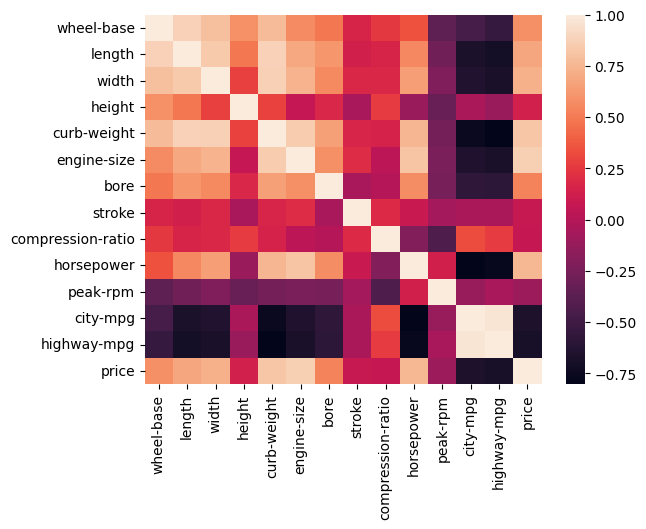

In [146]:
# prompt: perform correlation analysis heatmap for the df

import matplotlib.pyplot as plt
import seaborn as sns

# Get the correlation matrix
corr = df.corr()

# Create a heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Show the plot
plt.show()


**Plot regression analysis for price and engine-size with titles on y and x axis**

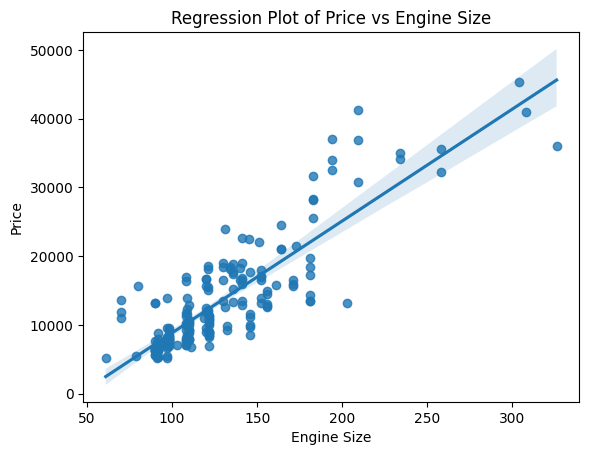

In [152]:
# prompt: perform regression analysis for price and engine-size with titles on y and x axis

sns.regplot(x="engine-size", y="price", data=df)
plt.title('Regression Plot of Price vs Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()


**Generate p value of 0.05 as threshold and and r square score for the regression analysis **

In [154]:
# prompt: generate p value of 0.05 as threshold and and r square score for the regression analysis above

from scipy import stats

# Calculate the Pearson correlation coefficient
correlation, p_value = stats.pearsonr(df['engine-size'], df['price'])

# Print the p-value and R-squared score
print("P-value:", p_value)
print("R-squared score:", correlation**2)


P-value: 1.001349653596123e-61
R-squared score: 0.7425284615069102


**Plot scatter Matrix for correlation analysis of data**

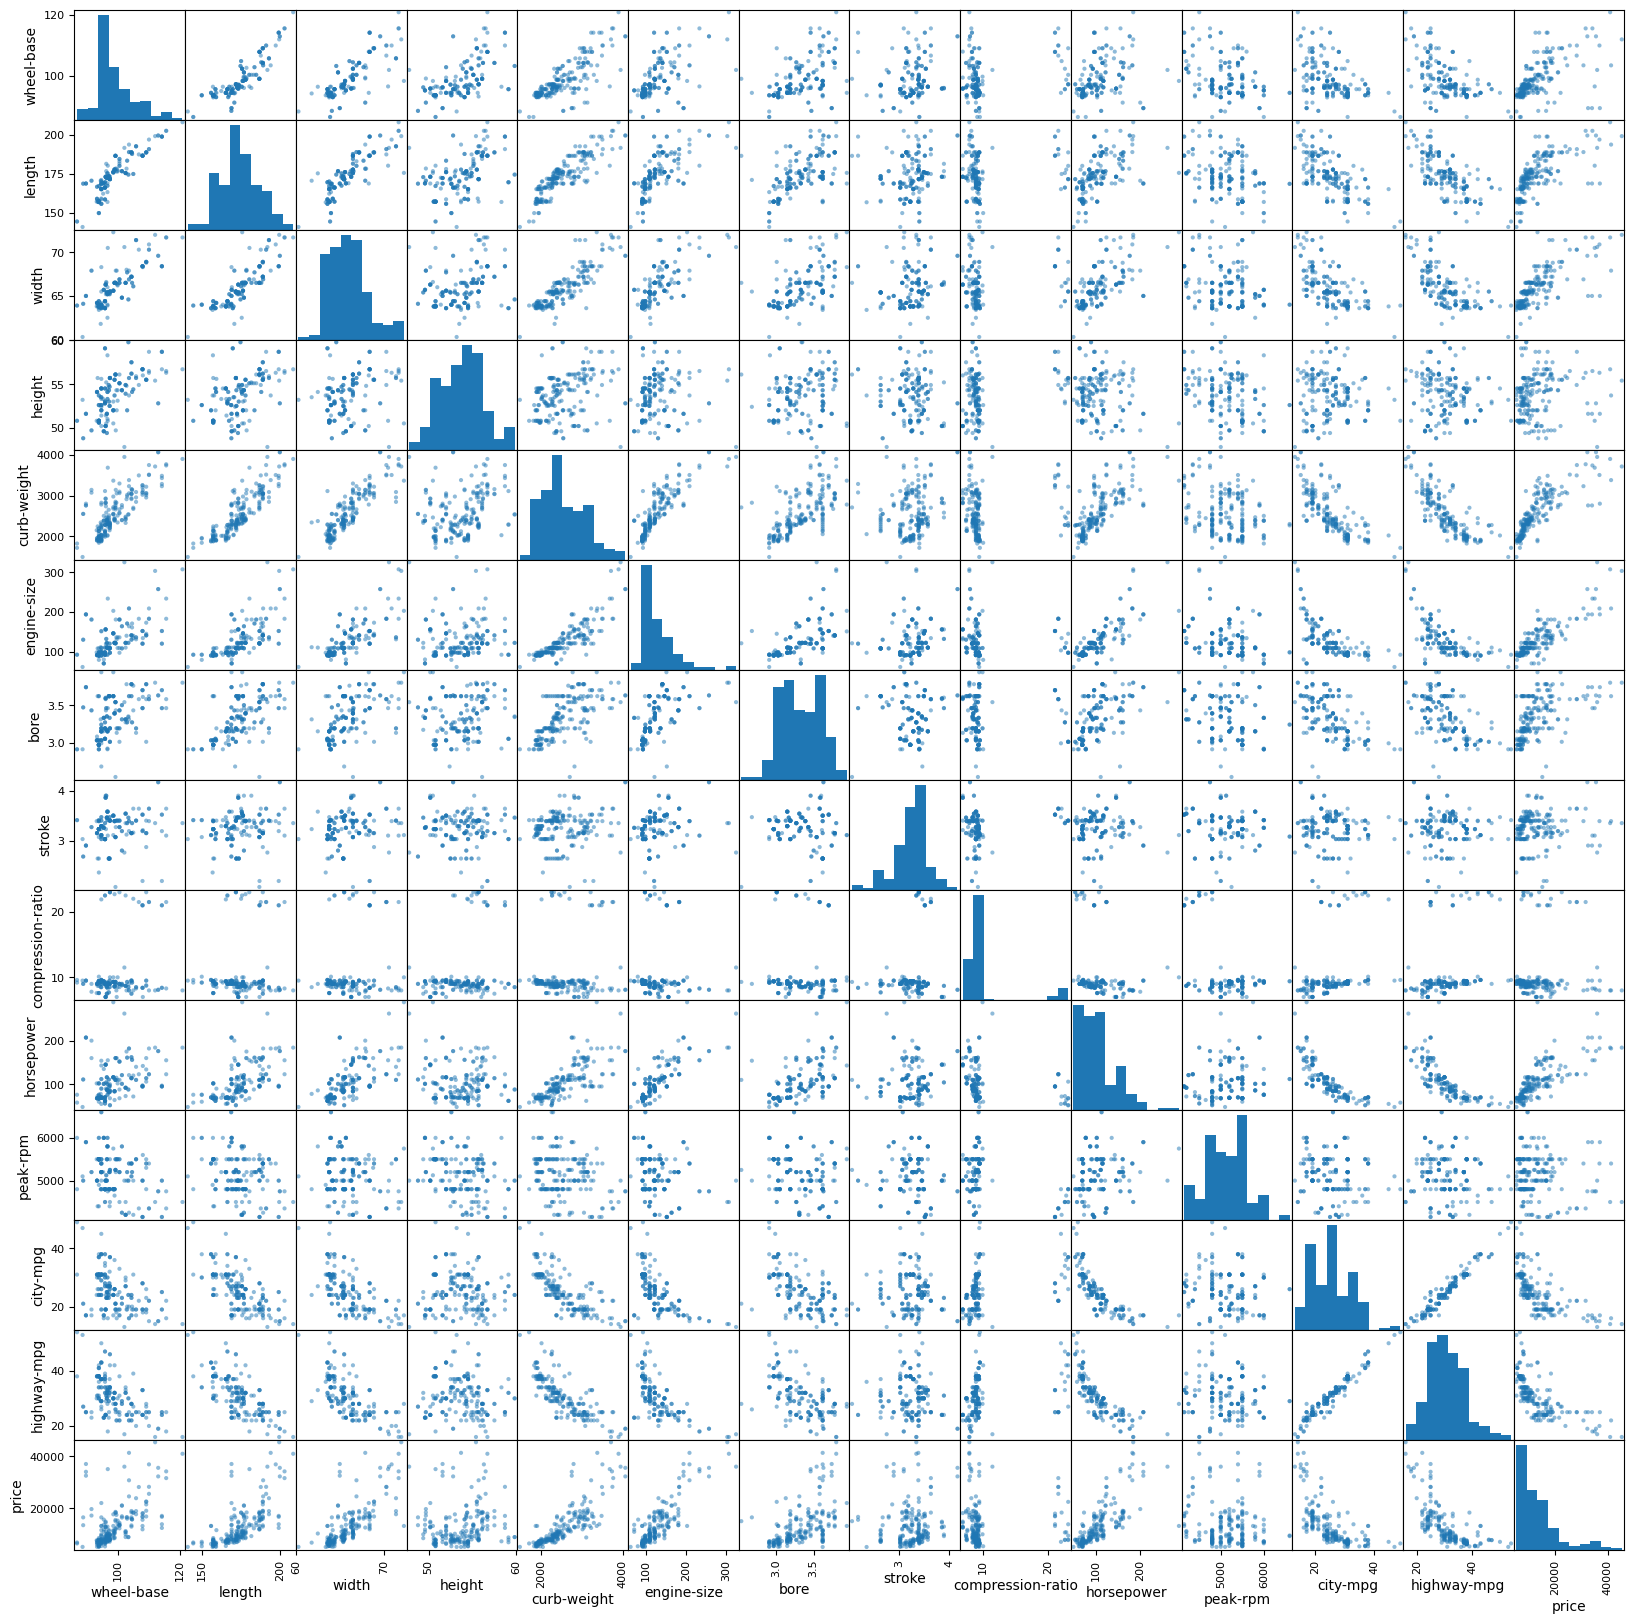

In [156]:
_ = pd.plotting.scatter_matrix(df,figsize=(20,20))

**Load Libraries for PCA**

In [157]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
import pandas as pd # pandas

**Drop make as a string from dataset**

In [158]:
make = df['make'].dropna()  # Extract the country name
df_vals_only = df.drop('make', axis = 1)

In [159]:
# Scale data and convert back to a DataFrame
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_scaled = scale.fit_transform(df_vals_only)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = [df_vals_only[:0]]
df_scaled.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,0.037065
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,0.419884
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404862,0.685920,-0.288349,1.261807,-0.263484,-0.953012,-0.691627,0.419884
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517248,0.462157,-0.035973,-0.057230,0.787346,-0.186865,-0.109354,0.095030
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517248,0.462157,-0.540725,0.272529,0.787346,-1.106241,-1.273900,0.540908


**Run PCA on the feature set dataframe**

In [160]:
# Run PCA on the feature set dataframe
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
principle_components = pca.fit_transform(df_scaled)

# Stick back into a DataFrame with the original country labels
df_pca = pd.DataFrame(principle_components)
df_pca = pd.concat([df_pca, pd.Series(make.array)], axis = 1)
df_pca.columns = ['pc1','pc2','pc3','make']
df_pca.head()

,pc1,pc2,pc3,make
0,-0.616619,-2.069250,0.471999,alfa-romero
1,-0.495729,-2.091187,0.427898,alfa-romero
2,0.409305,-1.251404,-1.369710,alfa-romero
3,-0.168333,-0.201692,-0.091701,audi
4,1.264589,-1.098376,-0.019007,audi


In [161]:
Y_label = []

for i in Y:
  if i == 0:
    Y_label.append('alfa-romero')
  elif i == 1:
    Y_label.append('toyota')
  else:
    Y_label.append('bmw')

mask = pd.DataFrame(Y_label, columns=['make'])

In [162]:
df_scores = pd.concat([df, make], axis=1)

In [163]:
print(f"Shape of loadings: {loadings.shape}")
print(f"Shape of df.columns: {df.columns.shape}")

Shape of loadings: (14, 3)
Shape of df.columns: (15,)


**Compute and retrieve the scores values**

In [164]:
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3'], index=df.columns[:14])
df_loadings

,PC1,PC2,PC3
make,0.289102,0.292015,0.126523
wheel-base,0.330813,0.164513,0.120053
length,0.327466,0.098750,-0.067337
width,0.106725,0.415644,0.452881
height,0.355831,0.056624,-0.052137
curb-weight,0.321345,-0.049184,-0.227548
engine-size,0.263388,-0.010210,0.161784
bore,0.053402,0.101108,-0.732491
stroke,0.015531,0.500040,-0.291369
compression-ratio,0.295018,-0.298707,-0.136335


**Explained variance for each PC**

In [165]:
# prompt: explained variance based on 100% ratio for pec

total_explained_variance = explained_variance.sum()
explained_variance_ratio = explained_variance / total_explained_variance
explained_variance_ratio_pec = explained_variance_ratio * 100
print(explained_variance_ratio_pec)


[67.77679199 21.36294272 10.86026529]


**Import Libraries for Scree Plot**

In [166]:
import numpy as np
import plotly.express as px

In [167]:
print(explained_variance_ratio_pec)

[67.77679199 21.36294272 10.86026529]


In [168]:
explained_variance_ratio_pec = np.insert(explained_variance, 0, 0)

In [169]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [170]:
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_ratio_pec_df = pd.DataFrame(explained_variance_ratio_pec, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

**Explained variance and cumulative variance**

In [171]:
df_explained_variance_ratio_pec = pd.concat([pc_df, explained_variance_ratio_pec_df, cumulative_variance_df], axis=1)
df_explained_variance_ratio_pec

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.527
1,PC1,0.527216,0.693
2,PC2,0.166176,0.777
3,PC3,0.084479,NaN


In [176]:
# https://plotly.com/python/bar-charts/

fig = px.bar(df_explained_variance_ratio_pec,
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [177]:
# https://plotly.com/python/creating-and-updating-figures/

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance_ratio_pec['PC'],
        y=df_explained_variance_ratio_pec['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance_ratio_pec['PC'],
        y=df_explained_variance_ratio_pec['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

In [178]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(
        x=df_explained_variance_ratio_pec['PC'],
        y=df_explained_variance_ratio_pec['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ), row=1, col=1
    )

fig.add_trace(
    go.Bar(
        x=df_explained_variance_ratio_pec['PC'],
        y=df_explained_variance_ratio_pec['Explained Variance'],
        marker=dict(color="RoyalBlue"),
    ), row=1, col=2
    )

fig.show()

**Perform cluster analysis**

In [183]:
# prompt: perform cluster analysis

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_vals_only)

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)

# Add cluster labels to the DataFrame
df_pca['cluster'] = kmeans.labels_

# Visualize the clusters
fig = px.scatter_3d(df_pca, x='pc1', y='pc2', z='pc3', color='cluster', symbol='make')
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**Create cluster analysis with t-SNE**

In [216]:
# prompt: create cluster analysis with t-SNE

from sklearn.manifold import TSNE

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_vals_only)

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)

# Add cluster labels to the DataFrame
df_pca['cluster'] = kmeans.labels_

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(scaled_data)

# Add t-SNE coordinates to the DataFrame
df_pca['tsne_x'] = tsne_data[:, 0]
df_pca['tsne_z'] = tsne_data[:, 1]



# Visualize the clusters
fig = px.scatter(df_pca, x='tsne_x', y='tsne_z', color='cluster', symbol='make')
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**Generate Gaussian cluster analysis**

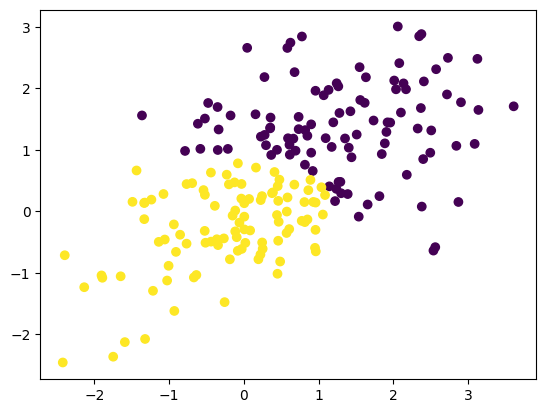

In [213]:
# prompt: generate Gaussian cluster analysis

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate random data
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=100)
Y = np.random.multivariate_normal([1, 1], [[1, 0.5], [0.5, 1]], size=100)

# Combine the data
data = np.concatenate((X, Y))

# Perform Gaussian Mixture Clustering
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

# Predict the cluster labels
labels = gmm.predict(data)

# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.show()
